Sedíme v 
https://schizyfos.files.wordpress.com/2020/05/img_5045.jpg

a prezentujeme si technickú prezentáciu, príklad prevzatý z 
https://realpython.com/python-keras-text-classification/

surovinou dátovej vedy je DATASET, stiahnutý odtiaľto:
https://realpython.com/python-keras-text-classification/
https://archive.ics.uci.edu/ml/datasets/Sentiment+Labelled+Sentence
Je to DATASET recenzii filmov. Uložíme ho do premennej typu pole a zobrazíme si ho.

In [ ]:
import pandas as pd

filepath_dict = {'yelp':   '~/sharedfolder/210219/Strom/Private/Ivan/Python/datasets/sentiment labelled sentences/sentiment labelled sentences/yelp_labelled.txt',
                 'amazon': '~/sharedfolder/210219/Strom/Private/Ivan/Python/datasets/sentiment labelled sentences/sentiment labelled sentences/amazon_cells_labelled.txt',
                 'imdb':   '~/sharedfolder/210219/Strom/Private/Ivan/Python/datasets/sentiment labelled sentences/sentiment labelled sentences/imdb_labelled.txt'}

df_list = []
for source, filepath in filepath_dict.items():
    df = pd.read_csv(filepath, names=['sentence', 'label'], sep='\t')
    df['source'] = source  # Add another column filled with the source name
    df_list.append(df)

df = pd.concat(df_list)
print(df.iloc[0])


In [59]:
print(df_list)

[                                              sentence  label source
0                             Wow... Loved this place.      1   yelp
1                                   Crust is not good.      0   yelp
2            Not tasty and the texture was just nasty.      0   yelp
3    Stopped by during the late May bank holiday of...      1   yelp
4    The selection on the menu was great and so wer...      1   yelp
5       Now I am getting angry and I want my damn pho.      0   yelp
6                Honeslty it didn't taste THAT fresh.)      0   yelp
7    The potatoes were like rubber and you could te...      0   yelp
8                            The fries were great too.      1   yelp
9                                       A great touch.      1   yelp
10                            Service was very prompt.      1   yelp
11                                  Would not go back.      0   yelp
12   The cashier had no care what so ever on what I...      0   yelp
13   I tried the Cape Cod ravoli,

Na modelových vetách pochopíme, čo je to vektorizácia textu

In [4]:
from sklearn.feature_extraction.text import CountVectorizer

In [15]:
sentences = ['John likes ice cream because of ice cream and ice cream likes John', 'John hates chocolate because of chocolate and chocolate likes John.']

In [12]:
vectorizer.fit(sentences)

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=False, max_df=1.0, max_features=None, min_df=0,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)

In [7]:
vectorizer = CountVectorizer(min_df=0, lowercase=False)

In [16]:
vectorizer.fit(sentences)

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=False, max_df=1.0, max_features=None, min_df=0,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)

In [17]:
vectorizer.vocabulary_

{'John': 0,
 'likes': 7,
 'ice': 6,
 'cream': 4,
 'because': 2,
 'of': 8,
 'and': 1,
 'hates': 5,
 'chocolate': 3}

In [18]:
vectorizer.transform(sentences).toarray()

array([[2, 1, 1, 0, 3, 0, 3, 2, 1],
       [2, 1, 1, 3, 0, 1, 0, 1, 1]])

Jednoduchý NLP MODEL sa učí rozlišovať recenzie na pozitívne a negatívne. Potom sa samotestuje a samovaliduje. 

In [19]:
from sklearn.model_selection import train_test_split

In [20]:
df_yelp = df[df['source'] == 'yelp']

In [21]:
sentences = df_yelp['sentence'].values

In [22]:
y = df_yelp['label'].values

In [25]:
sentences_train, sentences_test, y_train, y_test = train_test_split(
...    sentences, y, test_size=0.25, random_state=1000)

In [26]:
from sklearn.feature_extraction.text import CountVectorizer


In [27]:
vectorizer = CountVectorizer()

In [30]:
vectorizer.fit(sentences_train)

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)

In [31]:
X_train = vectorizer.transform(sentences_train)

In [32]:
X_test  = vectorizer.transform(sentences_test)

In [33]:
X_train

<750x1714 sparse matrix of type '<class 'numpy.int64'>'
	with 7368 stored elements in Compressed Sparse Row format>

In [36]:
from sklearn.linear_model import LogisticRegression


In [37]:
classifier = LogisticRegression()

In [38]:
classifier.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [39]:
score = classifier.score(X_test, y_test)

In [40]:
print(score)

0.796


In [41]:
for source in df['source'].unique():
    df_source = df[df['source'] == source]
    sentences = df_source['sentence'].values
    y = df_source['label'].values

    sentences_train, sentences_test, y_train, y_test = train_test_split(
        sentences, y, test_size=0.25, random_state=1000)

    vectorizer = CountVectorizer()
    vectorizer.fit(sentences_train)
    X_train = vectorizer.transform(sentences_train)
    X_test  = vectorizer.transform(sentences_test)

    classifier = LogisticRegression()
    classifier.fit(X_train, y_train)
    score = classifier.score(X_test, y_test)
    print('Accuracy for {} data: {:.4f}'.format(source, score))

Accuracy for yelp data: 0.7960
Accuracy for amazon data: 0.7960
Accuracy for imdb data: 0.7487


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Zložitejší NLP MODEL v https://keras.io/

In [42]:
from keras.models import Sequential

Using TensorFlow backend.


In [43]:
from keras import layers

In [44]:
input_dim = X_train.shape[1]

In [45]:
model = Sequential()

In [46]:
model.add(layers.Dense(10, input_dim=input_dim, activation='relu'))

In [47]:
model.add(layers.Dense(1, activation='sigmoid'))

In [48]:
model.compile(loss='binary_crossentropy', 
...               optimizer='adam', 
...               metrics=['accuracy'])

In [49]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 10)                25060     
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 11        
Total params: 25,071
Trainable params: 25,071
Non-trainable params: 0
_________________________________________________________________


In [51]:
history = model.fit(X_train, y_train,
...                     epochs=100,
...                     verbose=False,
...                     validation_data=(X_test, y_test),
...                     batch_size=10)

In [52]:
loss, accuracy = model.evaluate(X_train, y_train, verbose=False)

Overfitting je keď sa učiaci model učí úplne presne (training accuracy), ale nevie to dobre použiť (testing accuracy)

In [53]:
print("Training Accuracy: {:.4f}".format(accuracy))

Training Accuracy: 1.0000


In [54]:
loss, accuracy = model.evaluate(X_test, y_test, verbose=False)

In [55]:
print("Testing Accuracy:  {:.4f}".format(accuracy))

Testing Accuracy:  0.7861


Tu bola KERAS chyba premenných https://towardsdatascience.com/fixing-the-keyerror-acc-and-keyerror-val-acc-errors-in-keras-2-3-x-or-newer-b29b52609af9
    

In [68]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')

def plot_history(history):
    accuracy = history.history['accuracy']
    val_accuracy = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    x = range(1, len(accuracy) + 1)

    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(x, accuracy, 'b', label='Training accuracy')
    plt.plot(x, val_accuracy, 'r', label='Validation accuracy')
    plt.title('Training and validation accuracy')
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(x, loss, 'b', label='Training loss')
    plt.plot(x, val_loss, 'r', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()

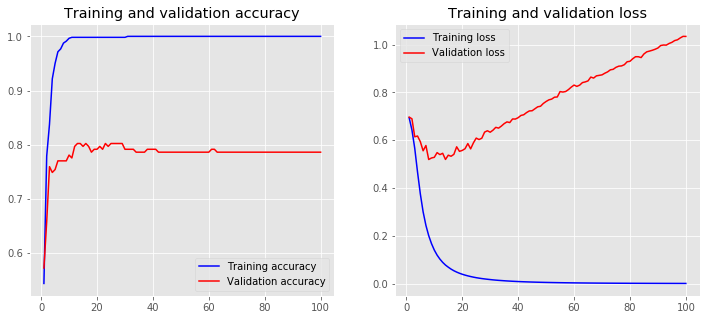

In [69]:
plot_history(history)

Zmena vektorizačnej metódy mapovaním (transformáciou) do geometrického priestoru (embedding space)(tokenizing)

In [72]:
from keras.preprocessing.text import Tokenizer
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(sentences_train)
X_train = tokenizer.texts_to_sequences(sentences_train)
X_test = tokenizer.texts_to_sequences(sentences_test)
vocab_size = len(tokenizer.word_index) + 1  # Adding 1 because of reserved 0 index
print(sentences_train[2])
print(X_train[2])



I am a fan of his ... This movie sucked really bad.  
[7, 150, 2, 932, 4, 49, 6, 11, 563, 45, 30]


In [85]:
for word in ['the', 'all', 'looks', 'good']:
    print('{}: {}'.format(word, tokenizer.word_index[word]))

the: 1
all: 27
looks: 431
good: 33


In [86]:
from keras.preprocessing.sequence import pad_sequences

In [87]:
maxlen = 100

In [88]:
X_train = pad_sequences(X_train, padding='post', maxlen=maxlen)

In [89]:
X_test = pad_sequences(X_test, padding='post', maxlen=maxlen)

In [90]:
print(X_train[0, :])

[170 116 390  35   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0]


Keras embeddovanie

In [93]:
from keras.models import Sequential
from keras import layers

embedding_dim = 50

model = Sequential()
model.add(layers.Embedding(input_dim=vocab_size, 
                           output_dim=embedding_dim, 
                           input_length=maxlen))
model.add(layers.Flatten())
model.add(layers.Dense(10, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 100, 50)           128750    
_________________________________________________________________
flatten_1 (Flatten)          (None, 5000)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                50010     
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 11        
Total params: 178,771
Trainable params: 178,771
Non-trainable params: 0
_________________________________________________________________


/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/indexed_slices.py:434: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Training Accuracy: 1.0000
Testing Accuracy:  0.7112


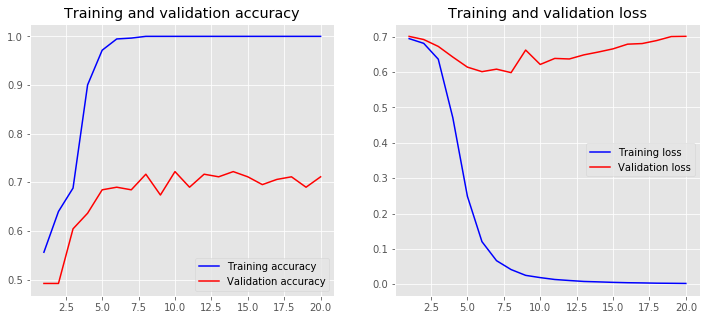

In [94]:
history = model.fit(X_train, y_train,
                    epochs=20,
                    verbose=False,
                    validation_data=(X_test, y_test),
                    batch_size=10)
loss, accuracy = model.evaluate(X_train, y_train, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = model.evaluate(X_test, y_test, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))
plot_history(history)

In [95]:
from keras.models import Sequential
from keras import layers

embedding_dim = 50

model = Sequential()
model.add(layers.Embedding(input_dim=vocab_size, 
                           output_dim=embedding_dim, 
                           input_length=maxlen))
model.add(layers.GlobalMaxPool1D())
model.add(layers.Dense(10, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 100, 50)           128750    
_________________________________________________________________
global_max_pooling1d_1 (Glob (None, 50)                0         
_________________________________________________________________
dense_5 (Dense)              (None, 10)                510       
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 11        
Total params: 129,271
Trainable params: 129,271
Non-trainable params: 0
_________________________________________________________________


Training Accuracy: 1.0000
Testing Accuracy:  0.7433


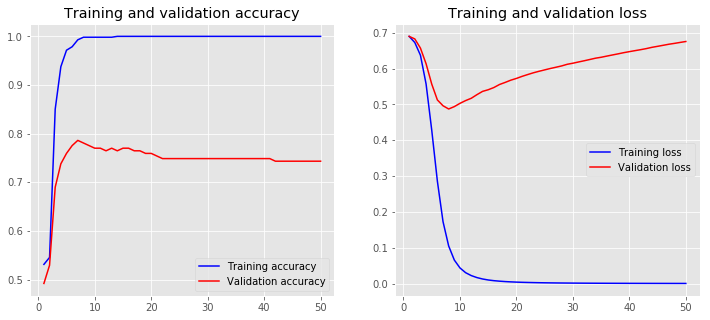

In [96]:
history = model.fit(X_train, y_train,
                    epochs=50,
                    verbose=False,
                    validation_data=(X_test, y_test),
                    batch_size=10)
loss, accuracy = model.evaluate(X_train, y_train, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = model.evaluate(X_test, y_test, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))
plot_history(history)

Keras konvolučný model

In [97]:
mbedding_dim = 100

model = Sequential()
model.add(layers.Embedding(vocab_size, embedding_dim, input_length=maxlen))
model.add(layers.Conv1D(128, 5, activation='relu'))
model.add(layers.GlobalMaxPooling1D())
model.add(layers.Dense(10, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, 100, 50)           128750    
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 96, 128)           32128     
_________________________________________________________________
global_max_pooling1d_2 (Glob (None, 128)               0         
_________________________________________________________________
dense_7 (Dense)              (None, 10)                1290      
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 11        
Total params: 162,179
Trainable params: 162,179
Non-trainable params: 0
_________________________________________________________________


Training Accuracy: 1.0000
Testing Accuracy:  0.7914


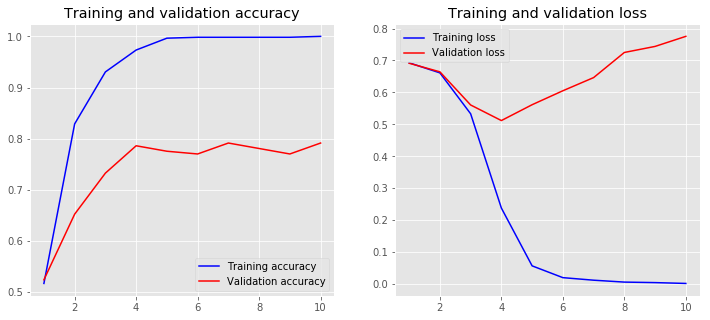

In [98]:
history = model.fit(X_train, y_train,
                    epochs=10,
                    verbose=False,
                    validation_data=(X_test, y_test),
                    batch_size=10)
loss, accuracy = model.evaluate(X_train, y_train, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = model.evaluate(X_test, y_test, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))
plot_history(history)

Už tretí model stále nevie zlepšiť svoje učenie. Môže to byť preto, lebo máme málo učiacich vzoriek, alebo data majú malý zovšeobecňovací potenciál, alebo potrebujeme vylaďovať hyperparametre

In [99]:
def create_model(num_filters, kernel_size, vocab_size, embedding_dim, maxlen):
    model = Sequential()
    model.add(layers.Embedding(vocab_size, embedding_dim, input_length=maxlen))
    model.add(layers.Conv1D(num_filters, kernel_size, activation='relu'))
    model.add(layers.GlobalMaxPooling1D())
    model.add(layers.Dense(10, activation='relu'))
    model.add(layers.Dense(1, activation='sigmoid'))
    model.compile(optimizer='adam',
                  loss='binary_crossentropy',
                  metrics=['accuracy'])
    return model

In [100]:
param_grid = dict(num_filters=[32, 64, 128],
                  kernel_size=[3, 5, 7],
                  vocab_size=[5000], 
                  embedding_dim=[50],
                  maxlen=[100])

Model, ktorý si vylaďuje hyperparametre

In [109]:
import time
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import RandomizedSearchCV

# Main settings
epochs = 20
embedding_dim = 50
maxlen = 100
output_file = 'data/output.txt'

# Run grid search for each source (yelp, amazon, imdb)
for source, frame in df.groupby('source'):
    print('Running grid search for data set :', source)
    sentences = df['sentence'].values
    y = df['label'].values

    # Train-test split
    sentences_train, sentences_test, y_train, y_test = train_test_split(
        sentences, y, test_size=0.25, random_state=1000)

    # Tokenize words
    tokenizer = Tokenizer(num_words=5000)
    tokenizer.fit_on_texts(sentences_train)
    X_train = tokenizer.texts_to_sequences(sentences_train)
    X_test = tokenizer.texts_to_sequences(sentences_test)

    # Adding 1 because of reserved 0 index
    vocab_size = len(tokenizer.word_index) + 1

    # Pad sequences with zeros
    X_train = pad_sequences(X_train, padding='post', maxlen=maxlen)
    X_test = pad_sequences(X_test, padding='post', maxlen=maxlen)

    # Parameter grid for grid search
    param_grid = dict(num_filters=[32, 64, 128],
                      kernel_size=[3, 5, 7],
                      vocab_size=[vocab_size],
                      embedding_dim=[embedding_dim],
                      maxlen=[maxlen])
    model = KerasClassifier(build_fn=create_model,
                            epochs=epochs, batch_size=10,
                            verbose=False)
    grid = RandomizedSearchCV(estimator=model, param_distributions=param_grid,
                              cv=4, verbose=1, n_iter=5)
    grid_result = grid.fit(X_train, y_train)

    # Evaluate testing set
    test_accuracy = grid.score(X_test, y_test)

    # Save and evaluate results
 #   prompt = input(f'finished {source}; write to file and proceed? [y/n]')
 #   if prompt.lower() not in {'y', 'true', 'yes'}:
 #       break
 #   with open(output_file, 'a') as f:
    s = ('Running {} data set\nBest Accuracy : '
             '{:.4f}\n{}\nTest Accuracy : {:.4f}\n\n')
    output_string = s.format(
            source,
            grid_result.best_score_,
            grid_result.best_params_,
            test_accuracy)
    print(output_string)
    time.sleep(5.5)
#        f.write(output_string)

Running grid search for data set : amazon
Fitting 4 folds for each of 5 candidates, totalling 20 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:  7.7min finished


Running amazon data set
Best Accuracy : 0.8151
{'vocab_size': 4603, 'num_filters': 128, 'maxlen': 100, 'kernel_size': 3, 'embedding_dim': 50}
Test Accuracy : 0.8384


Running grid search for data set : imdb
Fitting 4 folds for each of 5 candidates, totalling 20 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:  7.1min finished


Running imdb data set
Best Accuracy : 0.8185
{'vocab_size': 4603, 'num_filters': 32, 'maxlen': 100, 'kernel_size': 3, 'embedding_dim': 50}
Test Accuracy : 0.8443


Running grid search for data set : yelp
Fitting 4 folds for each of 5 candidates, totalling 20 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:  7.2min finished


Running yelp data set
Best Accuracy : 0.8161
{'vocab_size': 4603, 'num_filters': 64, 'maxlen': 100, 'kernel_size': 5, 'embedding_dim': 50}
Test Accuracy : 0.8282




Koniec 
https://www.youtube.com/watch?v=NUbYXitLcBM&list=PLyogAS9FyNeQM1u2X4Dlop-bPoxqwe-Aj&index=6, https://www.youtube.com/watch?v=wJIGOuojvf8